In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
k=0.2
g=9.8
L=9.8
k=0.5
phi=0.667
A=[1.35,1.45,1.47,1.5]
#A=[1.35,0.9,1.07,1.15]
def pend(x,t,A):
    theta=x[0]
    w=x[1]
    dtheta_dt=w
    dwdt=-g/L*np.sin(theta)-k*w+A*np.cos(phi*t)
    return [w,dwdt]

#Initialize position and velocity
x1=[0,1]
x2=[0.001,1]
#set time period
time=np.arange(0,188.4-47.1/2,0.01)

#calculate results
result135_1=odeint(pend,x1,time,args=(A[0],))
result145_1=odeint(pend,x1,time,args=(A[1],))
result147_1=odeint(pend,x1,time,args=(A[2],))
result150_1=odeint(pend,x1,time,args=(A[3],))

result135_2=odeint(pend,x2,time,args=(A[0],))
result145_2=odeint(pend,x2,time,args=(A[1],))
result147_2=odeint(pend,x2,time,args=(A[2],))
result150_2=odeint(pend,x2,time,args=(A[3],))

def angles(result):
    bin=[]
    for i in range(len(time)):
        b=round((result[i][0])%(2*np.pi),2)
        if b>np.pi:
            b -=2*np.pi
        bin.append(round(b,2))
    return bin
    

angle135_1=angles(result135_1)
angle145_1=angles(result145_1)
angle147_1=angles(result147_1)
angle150_1=angles(result150_1)

angle135_2=angles(result135_2)
angle145_2=angles(result145_2)
angle147_2=angles(result147_2)
angle150_2=angles(result150_2)

#print (len(time))

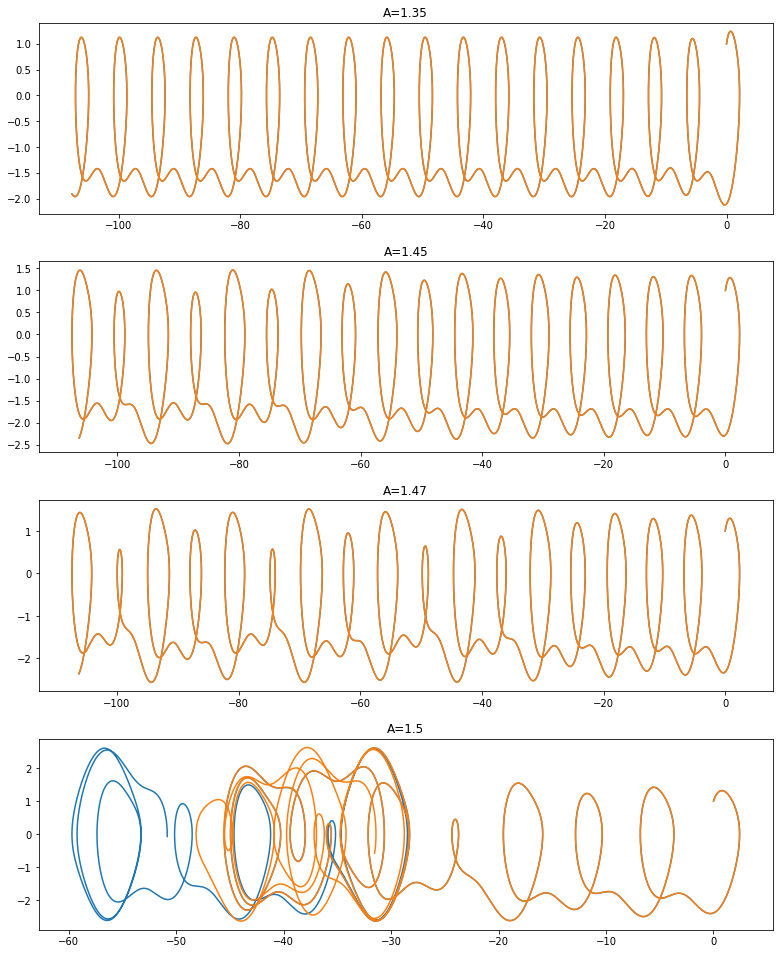

In [9]:
plt.figure(figsize=(12,15))
plt.subplot(411)
plt.plot(result135_1[:,0],result135_1[:,1])
plt.plot(result135_2[:,0],result135_2[:,1])
plt.title("A=1.35")

plt.subplot(412)
plt.plot(result145_1[:,0],result145_1[:,1])
plt.plot(result145_2[:,0],result145_2[:,1])
plt.title("A=1.45")

plt.subplot(413)
plt.plot(result147_1[:,0],result147_1[:,1])
plt.plot(result147_2[:,0],result147_2[:,1])
plt.title("A=1.47")
plt.subplot(414)
plt.plot(result150_1[:,0],result150_1[:,1])
plt.plot(result150_2[:,0],result150_2[:,1])
plt.title("A=1.5")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.3)

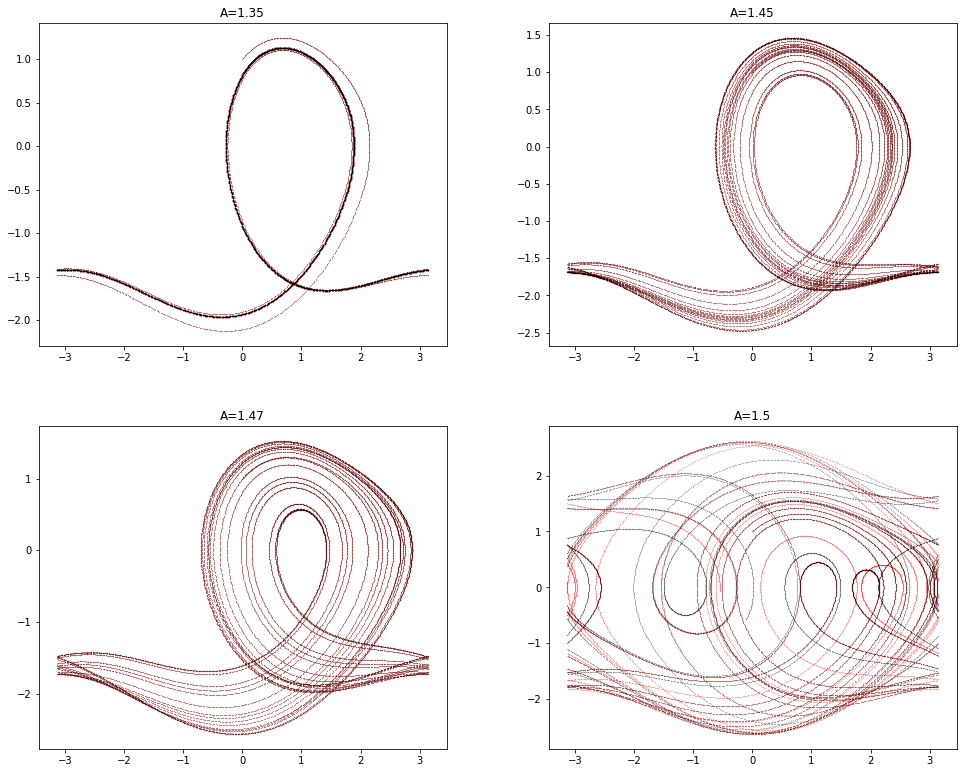

In [10]:
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.plot(angle135_1,result135_1[:,1],'r.',ms=0.2)
plt.plot(angle135_2,result135_2[:,1],'k.',ms=0.2)
plt.title("A=1.35")
plt.subplot(222)
plt.plot(angle145_1,result145_1[:,1],'r.',ms=0.2)
plt.plot(angle145_2,result145_2[:,1],'k.',ms=0.2)
plt.title("A=1.45")
plt.subplot(223)
plt.plot(angle147_1,result147_1[:,1],'r.',ms=0.2)
plt.plot(angle147_2,result147_2[:,1],'k.',ms=0.2)
plt.title("A=1.47")
plt.subplot(224)
plt.plot(angle150_1,result150_1[:,1],'r.',ms=0.2)
plt.plot(angle150_2,result150_2[:,1],'k.',ms=0.2)
plt.title("A=1.5")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)

In [11]:
# What is the time period of Driving force?
dT=np.pi/phi
print ("Time period of driving force is:",dT)

Time period of driving force is: 4.710033963402988


In [12]:
diff135=abs((result135_1[:,0]-result135_2[:,0]))
diff145=abs((result145_1[:,0]-result145_2[:,0]))
diff147=abs((result147_1[:,0]-result147_2[:,0]))
diff150=abs((result150_1[:,0]-result150_2[:,0]))


0.0935364487429576


Text(100, 1, 'y = 0.0935x -4.589')

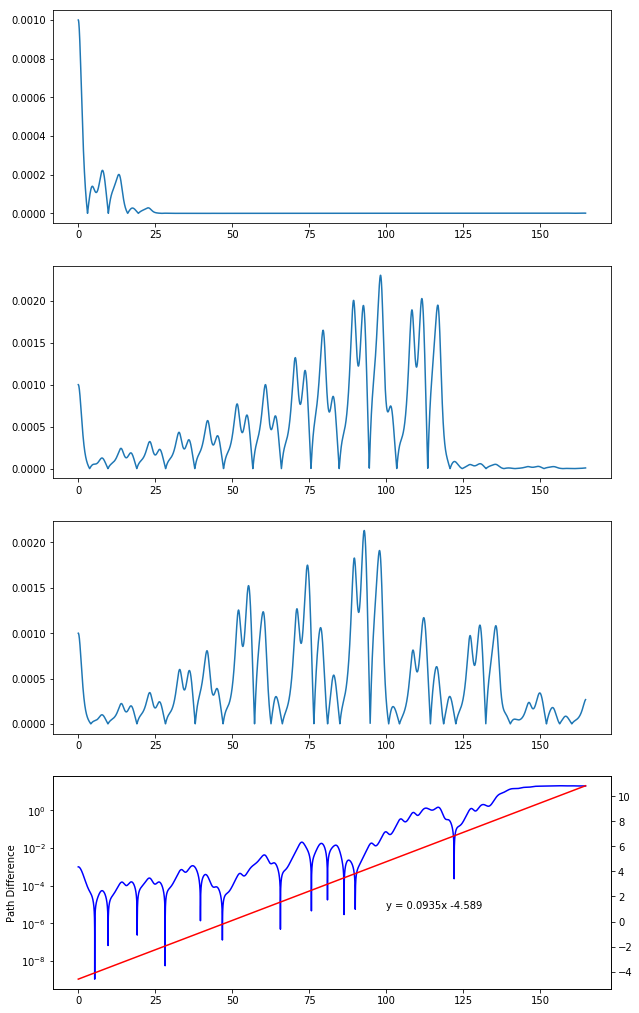

In [15]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(time,(diff150))
line = slope*time+intercept
print (slope)

plt.figure(figsize=(10,18))
plt.subplot(411)
plt.plot(time,diff135)
plt.subplot(412)
plt.plot(time,diff145)
plt.subplot(413)
plt.plot(time,diff147)

plt.subplot(414)
plt.ylabel('Path Difference')
plt.semilogy(time, diff150,'b-')
plt.twinx()
plt.plot(time,line, 'r-')
equation = 'y = ' + str(round(slope,4)) + 'x ' + str(round(intercept,4))
plt.text(100,1, equation)
#ax2.set_ylim(20000*km3yearToSv,70000*km3yearToSv)
#ax2.set_ylabel('Sv')
